In [20]:
# Let's import what we gonna to use firstly.
import nltk
import pandas as pd


from bs4 import BeautifulSoup
import re


# All the imports for the sentimental analysis

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
from wordcloud import WordCloud

sns.set(color_codes=True)

%matplotlib inline

In [21]:
dataset = pd.read_csv("Combined_dataset.csv", sep=',',low_memory=False)
original_data= pd.read_csv("sample.csv", sep=',',low_memory=False)

In [22]:
dataset.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US      2975964  R1NBG94582SJE2  B00I01JQJM       860486164   
1          US     23526356  R273DCA6Y0H9V7  B00TCO0ZAA       292641483   
2          US     52764145   RQVOXO7WUOFK6  B00B7733E0        75825744   
3          US     47348933  R1KWKSF21PO6HO  B006ZN4U34       789352955   
4          US     33680700  R38H3UO1J190GI  B00HUEBGMU        19067902   

                                       product_title product_category  \
0  GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...           Camera   
1  Professional 58mm Center Pinch Lens Cap for CA...           Camera   
2  Spy Tec Z12 Motion Activated Intelligent Secur...           Camera   
3  Celestron UpClose G2 10x25 Monocular, Black (7...           Camera   
4  Vidpro XM-L Wired Lavalier microphone - 20' Au...           Camera   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            2              1            1    N                 Y   
3            5              0            0    N                 Y   
4            5              1            1    N                 Y   

                                review_headline  \
0                                    Five Stars   
1                                    Love it!!!   
2                    Another Motion Detect Fail   
3           Exactly what I wanted and expected.   
4  Good mic at a Good Price...Not Canon Though.   

                                         review_body review_date  
0                                                 ok    31/08/15  
1          Perfect, even sturdier than the original!    31/08/15  
2  If the words, &#34;Cheap Chinese Junk&#34; com...    31/08/15  
3  Exactly what I wanted and expected. Perfect fo...    31/08/15  
4  I will look past the fact that they tricked me...    31/08/15

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        2099 non-null   object
 1   customer_id        2099 non-null   int64 
 2   review_id          2099 non-null   object
 3   product_id         2099 non-null   object
 4   product_parent     2099 non-null   int64 
 5   product_title      2099 non-null   object
 6   product_category   2099 non-null   object
 7   star_rating        2099 non-null   int64 
 8   helpful_votes      2099 non-null   int64 
 9   total_votes        2099 non-null   int64 
 10  vine               2099 non-null   object
 11  verified_purchase  2099 non-null   object
 12  review_headline    2099 non-null   object
 13  review_body        2099 non-null   object
 14  review_date        2099 non-null   object
dtypes: int64(5), object(10)
memory usage: 246.1+ KB


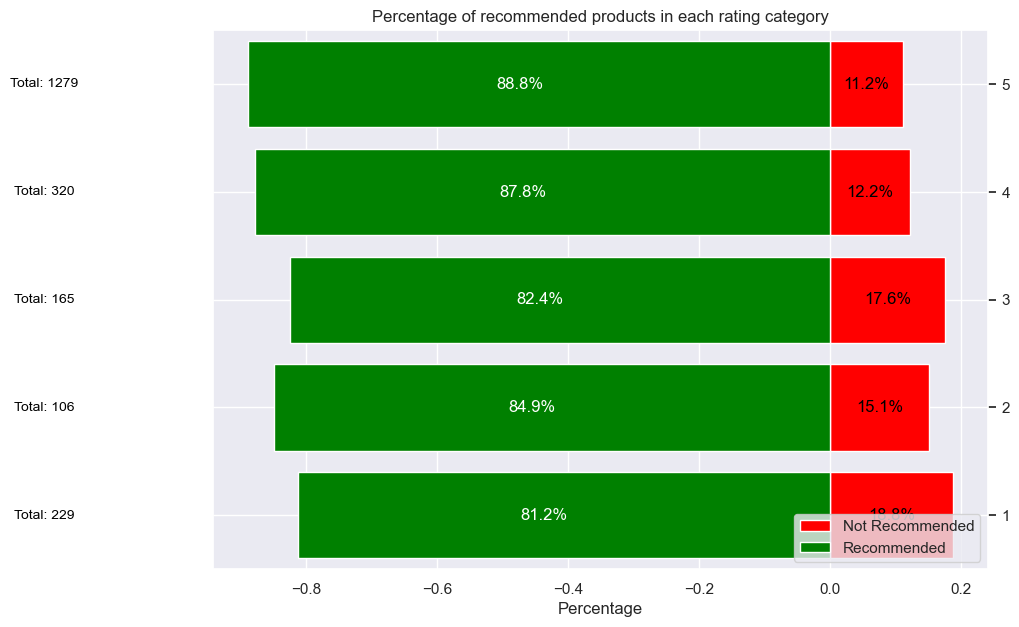

In [24]:
rating_recommended_percentage = dataset.groupby("star_rating")["helpful_votes"].value_counts(normalize=True).unstack().fillna(0)
rating_recommended_percentage['Recommended'] = 1 - rating_recommended_percentage[1]
rating_counts = dataset['star_rating'].value_counts()

rating_counts = rating_counts.sort_index()

# Butterfly chart
fig, ax = plt.subplots(figsize=(10, 7))

for i, (rating, count) in enumerate(rating_counts.items()):
    ax.text(-1.2, i, f'Total: {count}', ha='center', va='center', color='black', fontsize=10)
ax.barh(rating_recommended_percentage.index.astype(str), rating_recommended_percentage[1], color='red', label='Not Recommended')

# Not Recommended
ax.barh(rating_recommended_percentage.index.astype(str), -rating_recommended_percentage['Recommended'], color='green', label='Recommended')

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        label_x = width / 2 if width > 0 else (width / 2) - 0.03  # Adjusted label_x for better alignment
        label_color = 'white' if abs(width) > 0.5 else 'black'
        ax.annotate(f'{abs(width):.1%}', (label_x, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color=label_color)

ax.yaxis.tick_right()
ax.set_yticks(range(len(rating_recommended_percentage)))
ax.set_yticklabels(rating_recommended_percentage.index.astype(str))
ax.legend(loc='lower right')

ax.set_ylim([-0.5, len(rating_recommended_percentage) - 0.5])

plt.title("Percentage of recommended products in each rating category")
plt.xlabel("Percentage")
plt.show()

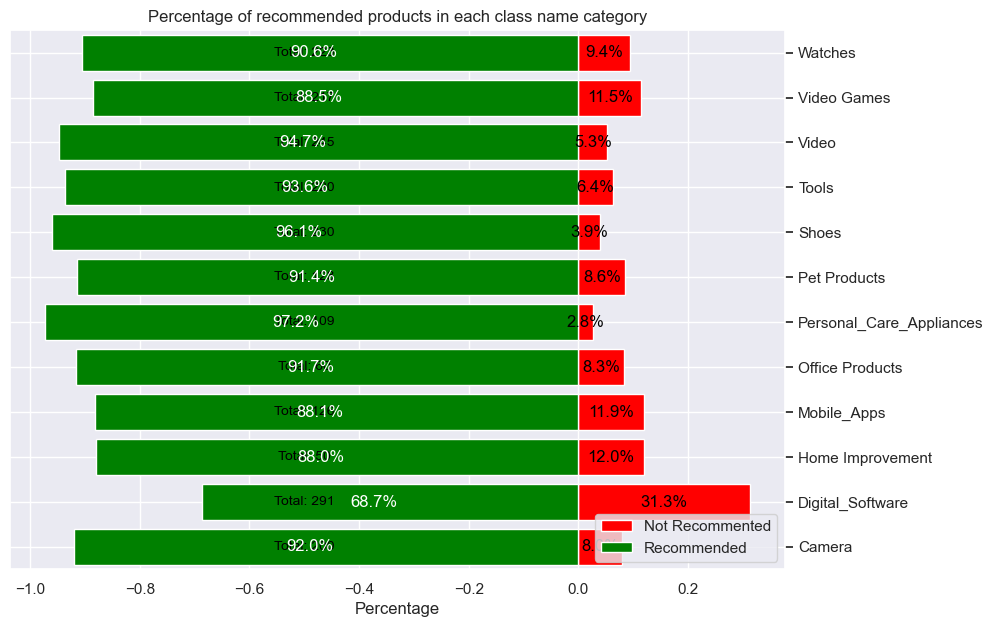

In [25]:
class_name_recommended_percentage = dataset.groupby("product_category")["star_rating"].value_counts(normalize=True).unstack().fillna(0)
class_name_recommended_percentage['Not Recommended'] = 1 - class_name_recommended_percentage[1]
class_name_counts = dataset['product_category'].value_counts()

class_name_counts = class_name_counts.sort_index()

# Butterfly chart
fig, ax = plt.subplots(figsize=(10, 7))

for i, (class_name, count) in enumerate(class_name_counts.items()):
    ax.text(-0.5, i, f'Total: {count}', ha='center', va='center', color='black', fontsize=10)

# Recommended
ax.barh(class_name_recommended_percentage.index.astype(str), class_name_recommended_percentage[1], color='red', label='Not Recommented')

# Not Recommended
ax.barh(class_name_recommended_percentage.index.astype(str), -class_name_recommended_percentage['Not Recommended'], color='green', label='Recommended')

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        label_x = width / 2 if width > 0 else (width / 2) - 0.03  # Adjusted label_x for better alignment
        label_color = 'white' if abs(width) > 0.5 else 'black'
        ax.annotate(f'{abs(width):.1%}', (label_x, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color=label_color)

ax.yaxis.tick_right()
ax.set_yticks(range(len(class_name_recommended_percentage)))
ax.set_yticklabels(class_name_recommended_percentage.index.astype(str))
ax.legend(loc='lower right')

# Set ylim for better alignment
ax.set_ylim([-0.5, len(class_name_recommended_percentage) - 0.5])

plt.title("Percentage of recommended products in each class name category")
plt.xlabel("Percentage")
plt.show()

/var/folders/4q/ld56_1kn62z9px05kfw3hnhw0000gn/T/ipykernel_5767/3443602626.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset["star_rating"])


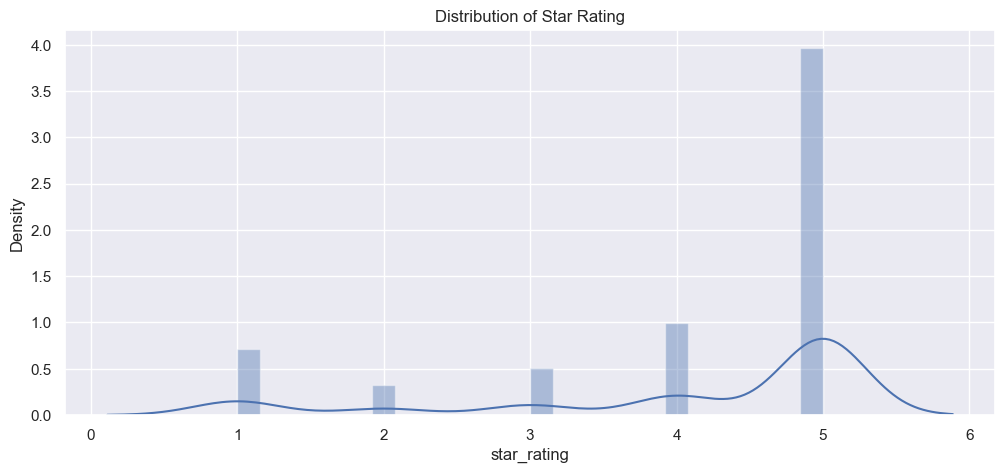

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.title("Distribution of Star Rating")
ax = sns.distplot(dataset["star_rating"])

In [27]:
data=pd.DataFrame(dataset)
col=["review_body","star_rating"]
data=data.loc[:,col]


In [28]:
data.head()


review_body  star_rating
0                                                 ok            5
1          Perfect, even sturdier than the original!            5
2  If the words, &#34;Cheap Chinese Junk&#34; com...            2
3  Exactly what I wanted and expected. Perfect fo...            5
4  I will look past the fact that they tricked me...            5

In [29]:
data['star_rating'].value_counts().sort_index(ascending=False)

star_rating
5    1279
4     320
3     165
2     106
1     229
Name: count, dtype: int64

In [30]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE) 
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['star_rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

review_body  star_rating  \
0                                                 ok            5   
1          Perfect, even sturdier than the original!            5   
2  If the words, &#34;Cheap Chinese Junk&#34; com...            2   
3  Exactly what I wanted and expected. Perfect fo...            5   
4  I will look past the fact that they tricked me...            5   

   sentiment_score sentiment  
0                1  POSITIVE  
1                1  POSITIVE  
2                0  NEGATIVE  
3                1  POSITIVE  
4                1  POSITIVE

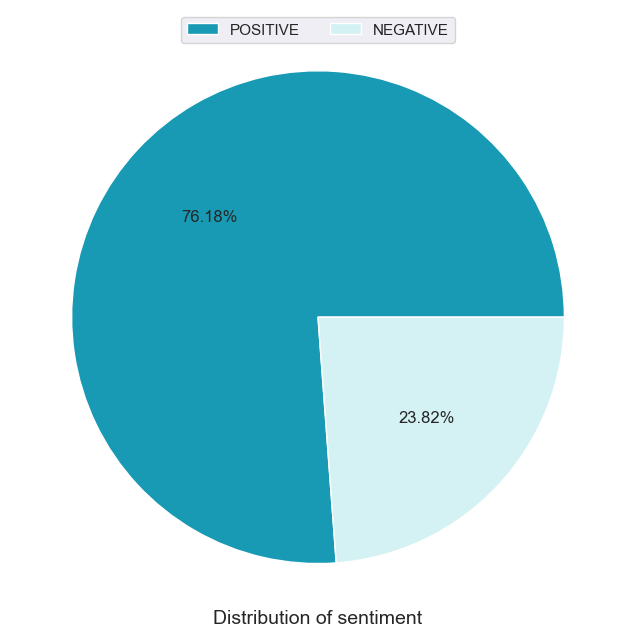

In [31]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [32]:
all_words = pd.Series(' '.join(data['review_body']).split())


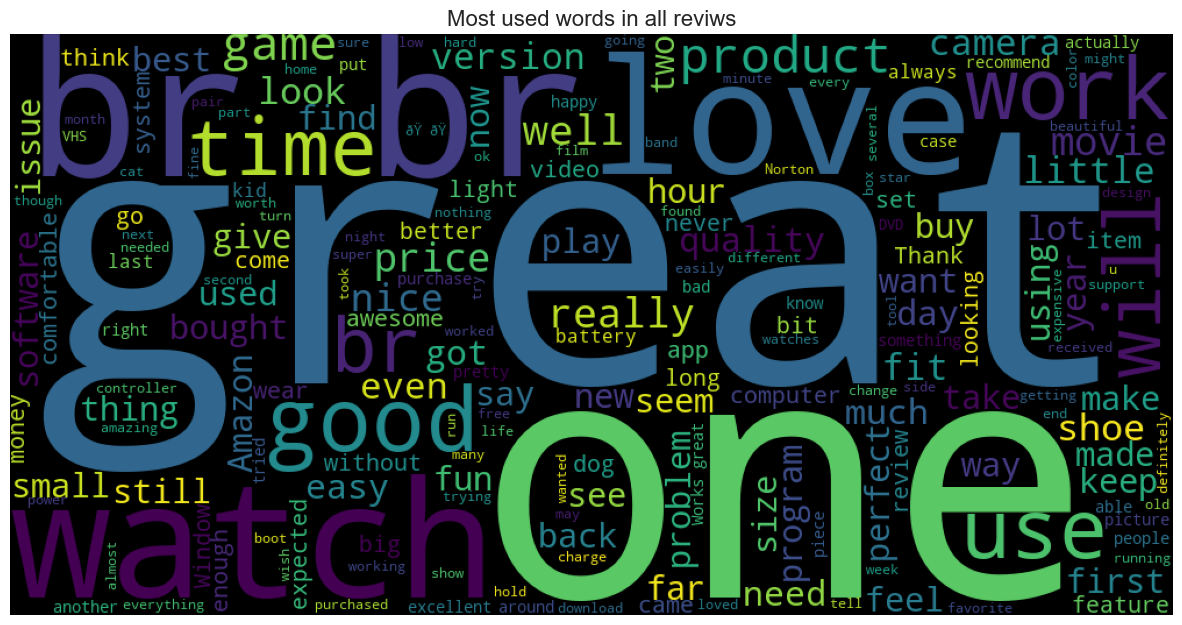

In [33]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

In [34]:
# get words used positive reivews 
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['review_body']).split())

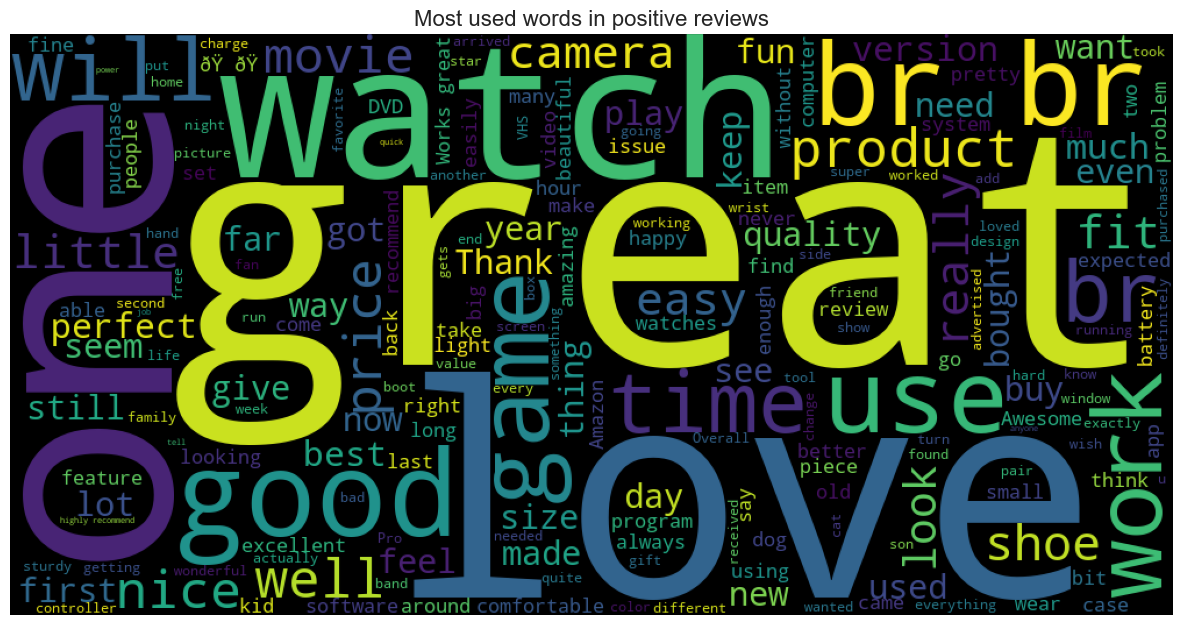

In [35]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=16)

plt.axis("off")
plt.show()

In [36]:
# get words used negative reivews 
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['review_body']).split())

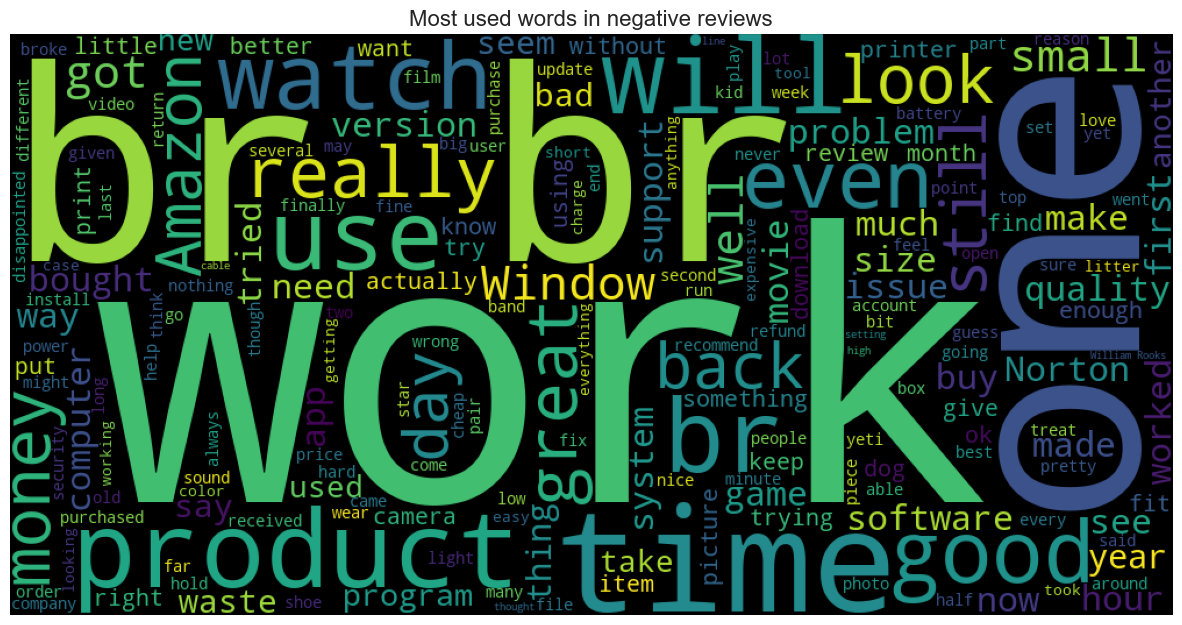

In [37]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

In [38]:
df = pd.read_csv("sample.csv", sep=',',low_memory=False)

In [39]:
df.head()

marketplace customer_id       review_id  product_id  product_parent  \
0          US    49033728  R1P1G5KZ05H6RD  6302503213     748506413.0   
1          US    17857748  R106N066IUN8ZV  B000059PET     478710180.0   
2          US    25551507   R7WTAA1S5O7D9   788812807     981002815.0   
3          US    21025041  R32HFMVWLYOYJK  6302509939     333219811.0   
4          US    40943563   RWT3H6HBVAL6G  B00JENS2BI     538101194.0   

                                       product_title product_category  \
0               The Night They Saved Christmas [VHS]            Video   
1  Hamlet / Kline, New York Shakespeare Festival ...            Video   
2  Nascar Dual Powered Calculator (Solar & Batter...            Video   
3  The Man From U.N.C.L.E, Volume 19: The Brain K...            Video   
4                    Playboy Video Party Jokes [VHS]            Video   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0          5.0            0.0          0.0    N                 Y   
1          5.0            0.0          0.0    N                 Y   
2          4.0            0.0          0.0    N                 Y   
3          5.0            0.0          0.0    N                 Y   
4          3.0            0.0          0.0    N                 N   

                 review_headline  \
0               Very satisfied!!   
1  The most talented actor ever!   
2                     Four Stars   
3                     Five Stars   
4          HOT women, dumb jokes   

                                         review_body review_date  
0  Fast shipping. Pleasure to deal with. Would re...  2015-08-31  
1  Kevin Kline is the most versatile, multi-talen...  2015-08-31  
2                                        great movie  2015-08-31  
3                   i love the martin landau episode  2015-08-31  
4  Y'know what this reminded me of? Those sketch ...  2015-08-31

In [40]:
df.head()
convert_dict = {'product_title': str,
                'review_body': str
                }
df = df.astype(convert_dict)
print(df.dtypes)

marketplace           object
customer_id           object
review_id             object
product_id            object
product_parent       float64
product_title         object
product_category      object
star_rating          float64
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
dtype: object


In [41]:
df.drop(['marketplace','customer_id','review_id','product_id','product_parent','helpful_votes','total_votes','vine','review_date'], axis=1, inplace=True)

In [42]:
df['star_rating'].value_counts()

star_rating
5.0    203986
4.0     67827
3.0     32468
1.0     25659
2.0     18022
Name: count, dtype: int64

In [43]:

def mapping(x):
    if x > 4: return 1
    if x <= 4: return 0

df['label']= df['star_rating'].apply(mapping)

df = df[['review_body', 'label','star_rating']]

In [44]:
from collections.abc import Mapping
for ele in df['star_rating'].values:
    mapping(ele)

In [45]:
df.head()

review_body  label  star_rating
0  Fast shipping. Pleasure to deal with. Would re...    1.0          5.0
1  Kevin Kline is the most versatile, multi-talen...    1.0          5.0
2                                        great movie    0.0          4.0
3                   i love the martin landau episode    1.0          5.0
4  Y'know what this reminded me of? Those sketch ...    0.0          3.0

In [46]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
df['tokenized_sentences_nltk'] = df['review_body'].apply(nltk.word_tokenize)
df['tokenized_sentences_naive'] = df['review_body'].apply(lambda s: s.split(' '))

from nltk.tokenize import word_tokenize as WordTokenizer
def custom_tokenize(text):
    if not text:
        print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    return word_tokenize(text)
# dataset['review_body'] = dataset.column.apply(custom_tokenize)
# We can tokenize a sentence using a tokenizer or splitting by space simply.
df['tokenized_sentences_nltk'] = df['review_body'].apply(nltk.word_tokenize) # it take some times
df['tokenized_sentences_naive'] = df['review_body'].apply(lambda s: s.split(' '))

[nltk_data] Downloading package stopwords to /Users/arun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/arun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/arun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/arun/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [47]:
stopwords = set(nltk.corpus.stopwords.words())
print(stopwords)

{'tho', 'todo', 'אותך', 'nekima', 'arratsaldero', 'spate', 'נגד', 'minuun', 'jisse', 'sarà', 'dina', 'bli', 'ছিল', 'আদ্যভাগে', 'korso', 'dess', 'janganlah', 'minkä', 'пырс', 'prvemu', 'sampai', 'bár', 'ενω', 'kitna', 'skozte', 'sub', '正常', 'ott', '心里', 'deires', 'teníamos', 'لكنَّ', 'өзің', 'namun', 'одан', "they've", 'מדוע', 'أوه', 'afterwards', 'moji', 'যাওয়া', 'tentulah', 'kakršnekoli', 'povrhu', 'sebagaimana', 'nekaka', 'עצמנו', 'γα', 'wahan', 'hendaklah', 'petinštiridesetima', 'qədər', 'тебя', '特殊', '当然', 'ús一', 'muss', 'lagta', 'ثم', 'tanto', 'meille', 'عليك', 'vore', 'יהיה', 'they', 'semasih', 'ура', 'četrta', 'әрне', 'war', 'doar', 'يمين', 'devetnajste', 'rasanya', 'little', 'әукім', 'সেখানে', 'jin', 'vsakršne', 'njenima', 'mukaan', 'μὲν', 'ityadi', 'sedikit', 'seriously', 'osmima', 'quanti', 'अलग', 'pels', 'оббо', 'dono', 'njegovem', 'עצמו', 'look', 'l', 'পেয়্র্', 'keseluruhan', 'terjadilah', 'marsikateremu', 'wir', 'ولكن', 'habe', 'səkkiz', 'mil', 'mendatang', 'želi', 'è', '

In [48]:
def clean_stopwords(sentence):
    res = []
    for word in sentence:
        if word not in stopwords:
            res.append(word)
    return res
    # return [w if w not in stopwords for w in sentence]

df['tokenized_sentences_nltk_remove_stopwords'] = df['tokenized_sentences_nltk'].apply(clean_stopwords)

In [49]:
pd.set_option('display.max_colwidth', 300)

In [50]:
df[['review_body', 'tokenized_sentences_nltk', 'tokenized_sentences_naive', 'tokenized_sentences_nltk_remove_stopwords','star_rating']].head()

review_body  \
0                                                                                                                                                                                                                                         Fast shipping. Pleasure to deal with. Would recommend. A+++. Thanks!   
1                                                                                                                Kevin Kline is the most versatile, multi-talented actor ever.  No matter what he does, it's done perfectly.  Wish he'd get more parts while we still have him with us.  I just love this man!   
2                                                                                                                                                                                                                                                                                                  great movie   
3                                                                                                                                                                                                                                                                             i love the martin landau episode   
4  Y'know what this reminded me of? Those sketch comedy-style features from the '70s like &#34;The Groove Tube&#34; and &#34;Can I Do It Till I Need Glasses?&#34;, with the only real difference being that this video is, well, shot on video and features what are, arguably, a hotter caliber of sexy w...   

                                                                                                                                                                                                                                                                                      tokenized_sentences_nltk  \
0                                                                                                                                                                                                                    [Fast, shipping, ., Pleasure, to, deal, with, ., Would, recommend, ., A+++, ., Thanks, !]   
1                                                                [Kevin, Kline, is, the, most, versatile, ,, multi-talented, actor, ever, ., No, matter, what, he, does, ,, it, 's, done, perfectly, ., Wish, he, 'd, get, more, parts, while, we, still, have, him, with, us, ., I, just, love, this, man, !]   
2                                                                                                                                                                                                                                                                                               [great, movie]   
3                                                                                                                                                                                                                                                                      [i, love, the, martin, landau, episode]   
4  [Y'know, what, this, reminded, me, of, ?, Those, sketch, comedy-style, features, from, the, '70s, like, &, #, 34, ;, The, Groove, Tube, &, #, 34, ;, and, &, #, 34, ;, Can, I, Do, It, Till, I, Need, Glasses, ?, &, #, 34, ;, ,, with, the, only, real, difference, being, that, this, video, is, ,, we...   

                                                                                                                                                                                                                                                                                     tokenized_sentences_naive  \
0                                                                                                                                                                                                                              [Fast, shipping., Pleasure, to, deal, with., Would, recommend., A+++., Thanks!]   
1    

In [51]:
cleaned_texts = df['tokenized_sentences_nltk_remove_stopwords'].values
labels = df['label'].values

In [52]:
word_frequency = {} 
word_energy = {}


for text, label in zip(cleaned_texts, labels):
    for word in text:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1
            
        if label == 1:
            if word not in word_energy:
                word_energy[word] = 1
            else:
                word_energy[word] += 1
        else:
            if word not in word_energy:
                word_energy[word] = -1
            else:
                word_energy[word] -= 1

In [53]:
for word in word_energy:
    word_energy[word] /= word_frequency[word]

In [54]:
reliable_word_energy = {}
for word in word_energy:
    # we assume that the energies would be reliable only for words that appear more than 500 times in our corpus. 
    if word_frequency[word] > 500: 
        reliable_word_energy[word] = word_energy[word]

In [55]:
top_30_positive_words = [v[0] for v in sorted(reliable_word_energy.items(), key=lambda x: x[1], reverse=True)[:300]]
top_30_negative_words = [v[0] for v in sorted(reliable_word_energy.items(), key=lambda x: x[1], reverse=False)[:300]]

In [56]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline

def plot_word_clouds(keywords):
    wordcloud = WordCloud().generate(' '.join(keywords))
    plt.figure(figsize=(1, 1))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [57]:
print(top_30_positive_words)

['Hoppy', 'Cisco', 'transfere', 'Died', 'FEATURES', 'B-Western', 'VCI', 'Monogram', 'HIGHLY', 'grandchildren', 'Entertainment', 'MUST', 'BEST', 'Brilliant', 'LOVED', 'WONDERFUL', 'EXCELLENT', 'timeless', "'40s", 'tire', 'Hatton', 'Vol', 'AWESOME', 'Highly', 'SPECIAL', 'all-time', 'cried', 'LOVE', 'WOW', 'NOW', 'unforgettable', 'awsome', 'heartwarming', "'30s", 'Excellent', 'Mack', 'Schindler', 'Bravo', 'finest', 'everytime', 'crisp', 'Marshal', 'Clyde', 'Steele', 'must-have', 'flawless', 'Cassidy', 'enchanting', 'GREAT', 'captivated', 'FUN', 'Thanks', 'Thank', 're-released', 'tuned', 'masterfully', "'em", 'ages', 'EVERY', 'penny', 'perfection', 'BIOS', 'Truly', 'CA', 'hooked', 'favorites', 'SEE', 'searched', 'cry', 're-release', 'Wonderful', 'incredible', 'BUY', 'tears', 'healing', 'must-see', 'superb', 'christmas', 'wonderful', 'Buy', 'awesome', 'brilliantly', 'heartbreaking', 'fabulous', 'astounding', 'WILL', 'amazing', 'PLEASE', 'Boyd', 'favorite', 'Crabbe', 'EVER', 'funniest', 'Bir

In [58]:
print(top_30_negative_words)

['nan', 'waste', 'redeeming', 'forgettable', 'disappointing', 'poorly', 'uneven', 'Save', 'mediocre', 'laughable', 'bland', 'lacks', 'lousy', 'Def', 'misleading', 'worst', 'lame', 'wasted', 'awful', 'miscast', 'pointless', 'mildly', 'tedious', 'Flair', 'disappointment', 'decent', 'contrived', 'turkey', 'dreadful', 'watchable', 'ludicrous', 'drags', 'lacked', 'Otherwise', 'predictable', 'low-budget', 'irritating', 'zero', 'Bulldog', 'insult', 'ridiculous', 'Champions', 'whatsoever', 'NWA', 'terrible', 'B-movie', 'alright', 'horrible', 'holes', 'WCW', 'adequate', 'annoying', 'trite', 'Michaels', 'worse', 'mess', 'weak', 'wooden', 'boring', 'distracting', 'pathetic', 'bothered', 'repetitive', 'stupid', 'rushed', 'pretentious', 'unnecessary', 'dull', 'frustrating', 'Luger', 'unrealistic', 'confusing', 'flat', 'Ric', 'cheap', 'lacking', 'Playmate', 'cliches', 'Unless', 'dumb', 'Mankind', 'premise', 'subplot', 'badly', 'excuse', 'competent', 'fairly', 'poor', 'disgusting', 'desired', 'hokey'

In [59]:
def calc_energies(sentence):
    score = 0
    if len(sentence) != 0:  # Check if the sentence is not empty
        for word in sentence:
            if word in reliable_word_energy:
                score += reliable_word_energy[word]
        score /= len(sentence)  # normalization
    return score

df['sentiment_energy'] = df['tokenized_sentences_nltk_remove_stopwords'].apply(calc_energies)

0.06000000000000005 0.6638330858877166


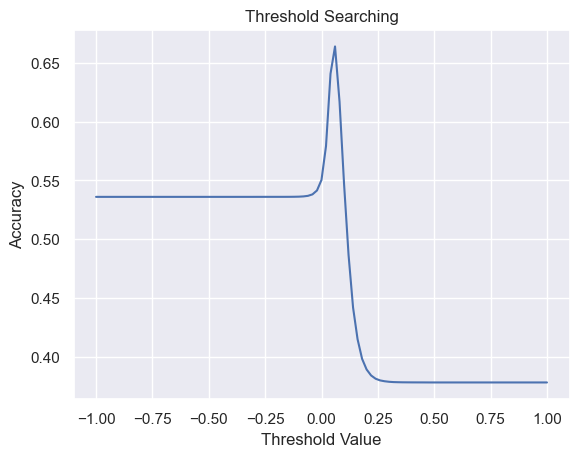

In [60]:
import numpy as np

def threshold_searching(left=-1, right=1, num_thresholds=101):
    record = []
    for i in np.linspace(left, right, num_thresholds):
        record.append(((df['sentiment_energy'] > i).astype('int') == df['label']).sum() / len(df))
    plt.title('Threshold Searching')
    plt.xlabel('Threshold Value')
    plt.ylabel('Accuracy')
    plt.plot(np.linspace(left, right, num_thresholds), record)
    best_train_threshold = np.linspace(left, right, num_thresholds)[record.index(max(record))]
    best_train_accuracy = max(record)
    return best_train_threshold, best_train_accuracy

best_train_threshold, best_train_accuracy = threshold_searching()
print(best_train_threshold, best_train_accuracy)

In [61]:
def our_sentiment_classifier(sentence, threshold=best_train_threshold):
    energy = calc_energies(sentence)
    if energy > threshold:
        return 1
    else:
        return 0

In [62]:
print('prediction', our_sentiment_classifier(['i', 'will', 'not', 'buy', 'it', 'again']))
print('prediction', our_sentiment_classifier(['all-time','AWESOME']))
print('prediction', our_sentiment_classifier(['it', 'is', 'really', 'Wonderful']))

prediction 0
prediction 1
prediction 1


In [63]:
data = pd.read_csv("sample1.csv", sep=',',low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: 'sample1.csv'

In [ ]:
data.drop(['marketplace','customer_id','review_id','star_rating','product_id','product_parent','helpful_votes','total_votes','vine','review_date'], axis=1, inplace=True)

In [ ]:
tokanized = {'Hoppy':'10', 'Cisco':'8', 'transfere':'7', 'Died':'7', 'FEATURES':'8', 'B-Western':'7', 
             'VCI':'2', 'Monogram':'4', 'HIGHLY':'10', 'grandchildren':'5', 'Entertainment':'3', 
             'MUST':'4', 'BEST':'7', 'Brilliant':'3', 'LOVED':'1', 'WONDERFUL':'7', 'EXCELLENT':'6', 
             'timeless':'9', "'40s":'8', 'tire':'4', 'Hatton':'4', 'Vol':'7', 'AWESOME':'5', 'Highly':'10', 
             'SPECIAL':'9', 'all-time':'1', 'cried':'5', 'LOVE':'2', 'WOW':'7', 'NOW':'5', 'unforgettable':'3', 
             'awsome':'8', 'heartwarming':'5', "'30s":'5', 'Excellent':'3', 'Mack':'10', 'Schindler':'6', 
             'Bravo':'8', 'finest':'7', 'everytime':'5', 'crisp':'3', 'Marshal':'9', 'Clyde':'10', 'Steele':'6', 
             'must-have':'4', 'flawless':'8', 'Cassidy':'10', 'enchanting':'5', 'GREAT':'8', 'captivated':'1', 
             'FUN':'10', 'Thanks':'8', 'Thank':'6', 're-released':'6', 'tuned':'2', 'masterfully':'4', "'em":'10', 
             'ages':'9', 'EVERY':'1', 'penny':'5', 'perfection':'6', 'BIOS':'6', 'Truly':'3', 'CA':'7', 'hooked':'9', 
             'favorites':'5', 'SEE':'5', 'searched':'10', 'cry':'5', 're-release':'2', 'Wonderful':'3', 
             'incredible':'8', 'BUY':'2', 'tears':'1', 'healing':'10', 'must-see':'5', 'superb':'2', 
             'christmas':'5', 'wonderful':'3', 'Buy':'6', 'awesome':'4', 'brilliantly':'7', 'heartbreaking':'1', 
             'fabulous':'10', 'astounding':'10', 'WILL':'10', 'amazing':'5', 'PLEASE':'2', 'Boyd':'10', 
             'favorite':'4', 'Crabbe':'7', 'EVER':'4', 'funniest':'3', 'Birth':'6', 'Goku':'8', 'cd':'7', 
             'inspirational':'7', 'outstanding':'8', 'superbly':'7', 'enthralled':'8', 'greatest':'4', 
             'Every':'2', 'humble':'1', 'magnificent':'2', 'SEEN':'8', 'loved':'5', 'gifts':'5', 
             'coolest':'6', '~':'9', 'fantastic':'9', 'phenomenal':'5', 'mesmerized':'2', 'Must':'1', 
             'WHEN':'2', 'joy':'9', 'footnote':'8', 'masterful':'8', 'Cobb':'6', 'truely':'2', 
             'wholesome':'6', 'awe':'10', 'masterpiece':'2', 'favourite':'10', 'amazed':'5', 'marvelous':'5',
             'highly':'5', 'MUSIC':'7', 'inspiring':'5', 'GET':'7', 'treasure':'1', 'regret':'2', 
             'Absolutely':'7', 'thrilled':'7', 'YEARS':'8', 'yrs':'3', 'lifetime':'4', 'soothing':'2', 
             'adore':'5', 'touched':'7', 'Cowboy':'6', 'highest':'2', 
             'Scrooge':'3', 'AGAIN':'10', 'concerts':'5', 'THEM':'6', "'20s":'9', 
             'pounds':'4', 'digitally':'8', 'hearts':'5', 'programs':'10', 'uplifting':'9', 
             'disney':'6', 'PBS':'7', 'boxed':'9', 'Simply':'6', 'MY':'2', 'exquisite':'3', 
             'blessed':'7', 'VIDEO':'8', 'chills':'1', 'digital':'7', 'poignant':'7', 'Buck':'5', 
             'HAVE':'1', 'YOU':'5', 'fortunate':'2', 'beautifully':'10', 'Dolby':'1', 'Awards':'10', 
             'magical':'1', 'Darcy':'2', 'dvd':'3', 'generations':'5', 'delighted':'6', 'mesmerizing':'1', 
             'WATCH':'8', 'captures':'3', 'haunting':'10', 'breathtaking':'3', 'OVER':'5', 'Walt':'4', 
             'recommended':'2', 'gem':'6', 'Great':'10', 'DVD':'4', 'touching':'10', 'compassion':'6', 
             'Clarence':'10', 'extraordinary':'7', 'copies':'1', 'stores':'9', 'Christmas':'2', 
             'IT':'2', 'brilliant':'10', 'simplicity':'1', 'courage':'6', 'captivating':'2', 'priceless':'3', 
             'thumbs':'8', 'miss':'3', 'happiness':'4', 'MOST':'6', 'universal':'6', 'loves':'10', 'sublime':'10', 
             'HAS':'8', 'Elliott':'4', 'remastered':'2', 'Amazing':'10', 'adorable':'6', 'delightful':'4', 
             'grandson':'3', 'OLD':'8', 'combines':'9', 'releasing':'3', 'bittersweet':'5', 'jewel':'8',
             'Holocaust':'7', 'Always':'7', 'THINK':'4', '!':'4', 'MOVIE':'8', 'MOVIES':'4', 'sadness':'5', 
             'perfect':'5', 'appreciation':'6', 'determination':'9', 'love':'8', 'loaded':'10', 'loving':'10', 
             'gift':'5', 'ALSO':'7', 'absolute':'3', 'catchy':'4', 'Loved':'3', 'forever':'3', 'heartfelt':'1',
             'motivating':'3', 'guarantee':'5', 'wonderfully':'9', 'achievement':'6', 'Each':'7', 'Awesome':'3', 
             'TRUE':'4', 'WE':'7', 'Capra':'2', 'Pictures':'10', 'grateful':'9', "'50s":'8', 'CAN':'1', 'Saw':'1', 
             'recomend':'1', 'spine':'5', 'genius':'10', 'ME':'10', 'everyday':'8', 'glued':'1', 'alike':'4', 
             'deeply':'6', 'concert':'2', 'holiday':'1', 'parent':'9', 'MADE':'2', 'soul':'1', 'remarkable':'5',
             'Morse':'5', 'vividly':'5', 'MANY':'3', 'THIS':'10', 'tear':'9', 'Total':'8', 'teaches':'7',
             'rocks':'4', 'Best':'7', 'reccomend':'2', 'BY':'8', 'Wiggles':'7', 'keeper':'1', 'taped':'8', 
             'friendship':'6', 'CD':'5', 'vintage':'8', 'riveting':'7', 'heart':'1', 'proud':'2', 'Beautiful':'2',
             'Henchman':'5', 'AND':'4', 'musicians':'3', 'delight':'5', 'notch':'7', 'profound':'4', 'Enjoy':'8', 
             'Tyler':'6', 'emotions':'2', 'exceptional':'5', 'educational':'2', 
             'Maurice':'3', 'tool':'3','nan':'-7', 'waste':'-7', 'redeeming':'-5', 'forgettable':'-10', 'disappointing':'-10', 
             'poorly':'-8', 'uneven':'-6', 'Save':'-8', 'mediocre':'-10', 'laughable':'-5', 'bland':'-7', 'lacks':'-5', 
             'lousy':'-7', 'Def':'-3', 'misleading':'-2', 'worst':'-3', 'lame':'-10', 'wasted':'-10', 'awful':'-10', 
             'miscast':'-8', 'pointless':'-8', 'mildly':'-10', 'tedious':'-9', 'Flair':'-8', 'disappointment':'-10', 
             'decent':'-1', 'contrived':'-5', 'turkey':'-6', 'dreadful':'-7', 'watchable':'-10', 'ludicrous':'-7', 'drags':'-9', 
             'lacked':'-9', 'Otherwise':'-9', 'predictable':'-9', 'low-budget':'-8', 'irritating':'-6', 'zero':'-2', 
             'Bulldog':'-9', 'insult':'-9', 'ridiculous':'-8', 'Champions':'-9', 'whatsoever':'-6', 'NWA':'-4', 'terrible':'-1', 
             'B-movie':'-10', 'alright':'-3', 'horrible':'-9', 'holes':'-5', 'WCW':'-6', 'adequate':'-5', 'annoying':'-1', 'trite':'-3', 
             'Michaels':'-10', 'worse':'-10', 'mess':'-1', 'weak':'-6', 'wooden':'-4', 'boring':'-7', 'distracting':'-1', 'pathetic':'-1', 
             'bothered':'-10', 'repetitive':'-5', 'stupid':'-3', 'rushed':'-7', 'pretentious':'-8', 'unnecessary':'-10', 'dull':'-7', 'frustrating':'-1', 
             'Luger':'-9', 'unrealistic':'-5', 'confusing':'-10', 'flat':'-5', 'Ric':'-6', 'cheap':'-9', 'lacking':'-3', 'Playmate':'-8', 
             'cliches':'-7', 'Unless':'-5', 'dumb':'-9', 'Mankind':'-7', 'premise':'-6', 'subplot':'-4', 'badly':'-1', 'excuse':'-4', 'competent':'-8', 
             'fairly':'-4', 'poor':'-1', 'disgusting':'-10', 'desired':'-6', 'hokey':'-9', 'melodramatic':'-8', 
             'garbage':'-4', 'ruined':'-1', 'franchise':'-8', 'Bam':'-10', 'inept':'-5', 'suffers':'-5', 'shallow':'-8', 
             'Poor':'-2', 'supposed':'-10', 'blah':'-9', 'fails':'-8', 'Steiner':'-8', 'Rating':'-4', 'credibility':'-10', 
             'Shawn':'-4', 'Apparently':'-3', 'Sting':'-5', 'supposedly':'-8', 'halfway':'-8', 'Unfortunately':'-4', 
             'suppose':'-6', 'average':'-10', 'Affleck':'-6', 'Nash':'-2', 'tracking':'-9', 'Sorry':'-10', 'PPV':'-6',
             'BAD':'-8', 'useless':'-10', 'Undertaker':'-2', 'trash':'-4', 'Champion':'-1', 'annoyed':'-3', 'overdone':'-5',
             'disbelief':'-7', 'horribly':'-4', 'Still':'-2', 'expecting':'-6', 'flawed':'-4', 'feud':'-5', 'Jar':'-2', 
             'dragged':'-8', 'Damme':'-2', 'faults':'-4', 'flaws':'-5', 'OK':'-4', 'Oswald':'-7', 'bother':'-1', 
             'continuity':'-5', 'Shamrock':'-8', 'pretty':'-2', 'acceptable':'-3', 'Bret':'-7', 'remotely':'-10', 
             'porn':'-7', 'v.':'-2', 'painfully':'-9', 'Playboy':'-9', 'grainy':'-8', 'Overall':'-10', 'Basically':'-4', 
             'sucks':'-1', 'sucked':'-9', 'apparently':'-5', 'tournament':'-9', 'Lex':'-6', 'merit':'-10', 
             'Nonetheless':'-8', 'rating':'-1', 'Diesel':'-2', 'questionable':'-1', 'gratuitous':'-10', 
             'blame':'-3', 'thin':'-8', 'cliche':'-2', 'nude':'-7', 'rubber':'-1', 'cash':'-2', 'barely':'-4', 
             'hype':'-7', 'killings':'-9', 'Month':'-4', 'Daleks':'-8', 'slasher':'-9', 'disappointed':'-7', 
             'awkward':'-10', 'skip':'-4', 'bore':'-3', 'random':'-5', 'cheesy':'-4', 'potential':'-5', 
             'View':'-2', 'beware':'-8', 'budget':'-6', 'Hammer':'-2', 'Stooges':'-10', 'Rumble':'-3', 
             'makers':'-6', 'Hogan':'-3', 'attempt':'-6', 'Kidman':'-3', 'stunt':'-10', 'logic':'-7', 
             'zombie':'-7', 'zombies':'-10', 'VS':'-6', 'Granted':'-8', 'lack':'-9', 'terribly':'-6', 
             'worthwhile':'-5', 'campy':'-4', 'Instead':'-4', 'Macbeth':'-3', 'Tag':'-6', 'formula':'-8', 
             'Nevertheless':'-3', 'reduced':'-10', 'asleep':'-7', 'fault':'-9', 'kung':'-3', 'promising':'-7', 
             'spends':'-9', 'Owen':'-1', 'joke':'-4', 'naked':'-10', 'crap':'-7', 'murders':'-10', 'stiff':'-5', 
             'Bottom':'-5', 'nonsense':'-3', 'Bad':'-2', 'Goldberg':'-6', 'Championship':'-8', 'mindless':'-3', 
             'junk':'-7', 'threw':'-7', 'flaw':'-5', 'corny':'-10', 'expected':'-4', 'Vader':'-7', 
             'originality':'-8', 'instead':'-6', 'loosely':'-2', 'flashbacks':'-9', 'sounded':'-6', 
             'rip':'-3', 'renting':'-3', 'frankly':'-6', 'vampires':'-9', 'fair':'-6', 'die-hard':'-7', 
             'errors':'-5', 'werewolf':'-8', 'match':'-9', 'credible':'-5', 'silly':'-6', 'melodrama':'-10', 
             'entry':'-8', 'brawl':'-2', 'Sid':'-5', 'Given':'-4', 'fuzzy':'-10', 'gross':'-2', 'amusing':'-10', 
             'merits':'-3', 'fake':'-8', 'ripped':'-8', 'However':'-6', 'absurd':'-1', 'generally':'-9', 
             'spots':'-8', 'slow':'-9', 'Read':'-10', 'explanation':'-5', 'Wesley':'-2', 'oddly':'-5', 
             'resemblance':'-3', 'cop':'-3', 'Grade':'-4', 'problem':'-5', 'Gere':'-3', 'V.':'-1', 'device':'-10', 
             'guess':'-5', 'Brosnan':'-10', 'victims':'-3', 'stereotypical':'-7', 'Parenthetical':'-10', 
             'Batman':'-8', 'screenwriter':'-6', 'wrestlers':'-8', 'obvious':'-9', 'obnoxious':'-9', 
             'basically':'-3', 'matches':'-7', 'downright':'-1', 'ruins':'-5', 'Dracula':'-4', 
             'unfortunately':'-2', 'strictly':'-5', 'nudity':'-7', 'Interesting':'-10', 'predecessor':'-3', 
             'inferior':'-4', 'superficial':'-5', 'dubbing':'-1', 'hoped':'-10', 'conspiracy':'-7'}

In [ ]:
score_word_dict = dict(tokanized)

In [ ]:
data.review_body = data.review_body.astype(str)

In [ ]:
def definition_score(df, score_word_dict):
    score = 0
    words = df.lower().split(" ")
    for word in words:
        if(word in score_word_dict):
            score += int(score_word_dict[word])
            
    return score

In [ ]:
scores=[]
for d in data['review_body']:
    score = definition_score(d, score_word_dict)
    print(score)
    scores.append(score)

In [ ]:
data['definition_feeling_score'] = scores

In [ ]:
urban_data_sort_by_feeling = data.sort_values(by=['definition_feeling_score'])

In [ ]:
urban_data_sort_by_feeling[['review_body','product_category','definition_feeling_score']][:15]

In [ ]:
worst_sentiment__words = urban_data_sort_by_feeling.product_category[:25].to_string().replace("$", "s")
wordcloud = WordCloud(background_color='white', relative_scaling=0, normalize_plurals = True).generate(worst_sentiment__words.lower())
plt.title("Worst Sentiment Words")

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [ ]:
urban_data_sort_by_feeling[['review_body','product_category','definition_feeling_score']][-15:]

In [ ]:
max_definition_feeling = data['definition_feeling_score'].max()
min_definition_feeling = data['definition_feeling_score'].min()

bins = [min_definition_feeling-1,-1,1,max_definition_feeling+1]
definition_feeling_range = ['Negative','Neutral','Positive']

data['definition_feeling_category'] = pd.cut(data['definition_feeling_score'],
                                                   bins,
                                                   labels=definition_feeling_range)

In [ ]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val=int((pct*total/100.0)+0.5)
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [ ]:
urban_data_definition_feeling_category = data['definition_feeling_category'].value_counts()
urban_data_definition_feeling_category.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(urban_data_definition_feeling_category));